In [1]:
import json
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

### Preprocess Data

In [2]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    machine='entsorgung_10T', 
    freq=10,
    normalize_time=True
    )

### 10 minutes agg.

In [3]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.08, 0.11) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.18, 0.21) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha

local_variation_2 = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
    )



covar_module = locally_short_periodic + locally_long_periodic + local_variation #+ local_variation_2

### Create, Train, and Perform Inference

Iter 1 , Loss = 0.8500555625740601 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.8123167471863256 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.7745488881480583 , Noise = 0.598214328289032
Iter 4 , Loss = 0.7367457886803049 , Noise = 0.5543737411499023
Iter 5 , Loss = 0.6988420817169332 , Noise = 0.5129404664039612
Iter 6 , Loss = 0.6608369052172066 , Noise = 0.4738723635673523
Iter 7 , Loss = 0.6229032601271585 , Noise = 0.43712007999420166
Iter 8 , Loss = 0.5853087275366519 , Noise = 0.40262749791145325
Iter 9 , Loss = 0.5481550539752607 , Noise = 0.3703330457210541
Iter 10 , Loss = 0.511336127673834 , Noise = 0.34016966819763184
Iter 11 , Loss = 0.4746788031715005 , Noise = 0.3120647668838501
Iter 12 , Loss = 0.4379568066742903 , Noise = 0.28594014048576355
Iter 13 , Loss = 0.40096599291520213 , Noise = 0.26171237230300903
Iter 14 , Loss = 0.3636643289574113 , Noise = 0.23929350078105927
Iter 15 , Loss = 0.3262081662632068 , Noise = 0.21859228610992432
Iter 16 , Loss = 0.288916486

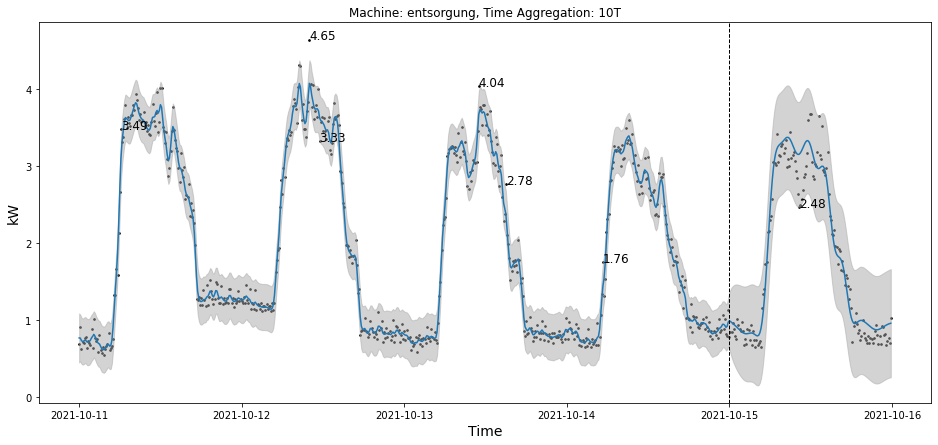

Paper Disposal Machine (Entsorgung)
-----------------------------------
Expected next day energy consumption    =  134.8311057783519 kWh
Upper bound next day energy consumption =  182.74026792399866 kWh
Lower bound next day energy consumption =  86.92194363270511 kWh


Abnormal High Energy Consumption
---------------------------------
2021-10-11 06:10:00 3.488960125981707
2021-10-12 10:00:00 4.64791616469222
2021-10-13 11:00:00 4.038448186547328
2021-10-13 15:00:00 2.776680900796433
2021-10-14 05:20:00 1.7567405823096849


Abnormal Low Energy Consumption
---------------------------------
2021-10-12 11:30:00 3.3326154540807047
2021-10-15 10:20:00 2.4783728365630524


In [4]:
model, likelihood, mse, mape, perf_dev_upper = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    training_iter=50,
    lr=0.1, 
    time_agg='10T',
    machine='entsorgung',
    update_score=False
)

In [ ]:
for time, val in perf_dev_upper.items():
    print(time, val)

In [ ]:
model.state_dict()

In [ ]:
mse, mape

### 5 minutes agg.

In [ ]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    machine='entsorgung_5T', 
    freq=5,
    normalize_time=True
    )

In [ ]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.08, 0.11) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.18, 0.21) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation

In [ ]:
model, likelihood, mse, mape, perf_dev_upper = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    training_iter=100,
    lr=0.01,
    time_agg='5T',
    machine='entsorgung',
    update_score=False
)

In [ ]:
mse, mape